# Introduction

> Can we use Machine Learning to predict realty price fluctuations in Russia's volatile economy ?

The goal is to predict the sale price of each property based on several factors. The sale price which is represented by `price_doc` in the dataset is the target variable. The training dataset - here refered to by `srb.txt`, is data collected over a period of August 2011 to June 2015. Using this training data, we learn the patterns in the data and then attempt to predict the price of each property for the test dataset - which is data collected over the period of July 2015 to May 2016. 

Since the value of the target variable is known when training the model, this will be a Supervised Learning task. Moreover, the target variable - sale price is a continuous variable, which implies the use of a Multivariate non-linear non-parametric Regression algorithm.

Before diving into Regression analysis, it is vital to check if the dataset is clean. There are several things to consider while cleaning the dataset. Some things which are routinely checked are:
    - Inconsitent column names
    - Missing data
    - Outliers
    - Duplicate rows
    - Untidy data
    - Need to process columns
    - Column types can signal unexpected data values

Of these, we will start by looking at the missingness in the dataset. Is there a pattern to missigness or is it random ? What are some of the techniques used to handle missing data ? Can we rely on imputing data ? If so, can we use Multiple Imputation ?

## Why is this data missing ?
It is important to understand the data collection process to reasonably explain why the data is missing. The nature and mechanism of missing data can be categorized into four classes. Understanding the mechanism is very useful in understanding the appropriate analysis to use. 

    1. `Missing Completely at Random`: This means that the nature of missing data is not related to any of the variables. In this case, the missingness is completely unsystematic. 
    2. `Missing at Random`: This means that the nature of the missing data is related to the observed data but not the missing data.
    3. `Missing Not At Random`: This is also known as non-ignorable because the missingness mechanism cannot be ignored. 

## Handling missing data
In this notebook we will explore how to deal with missing data. What the are common techniques that we can use to handle missing-ness. Specifically, we will look into one technique called `Imputation` and variant of it called `Multiple Imputation`. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
srb = pd.read_csv("/Users/Shravan/Downloads/srb.txt")

In [ ]:
srb.info(verbose=True)

In [3]:
srb.shape

(30471, 292)

In [27]:
nrows = srb.shape[0]
ncols = srb.shape[1]
print("Rows = " + str(nrows) + " Cols = " + str(ncols))

Rows = 30471 Cols = 292


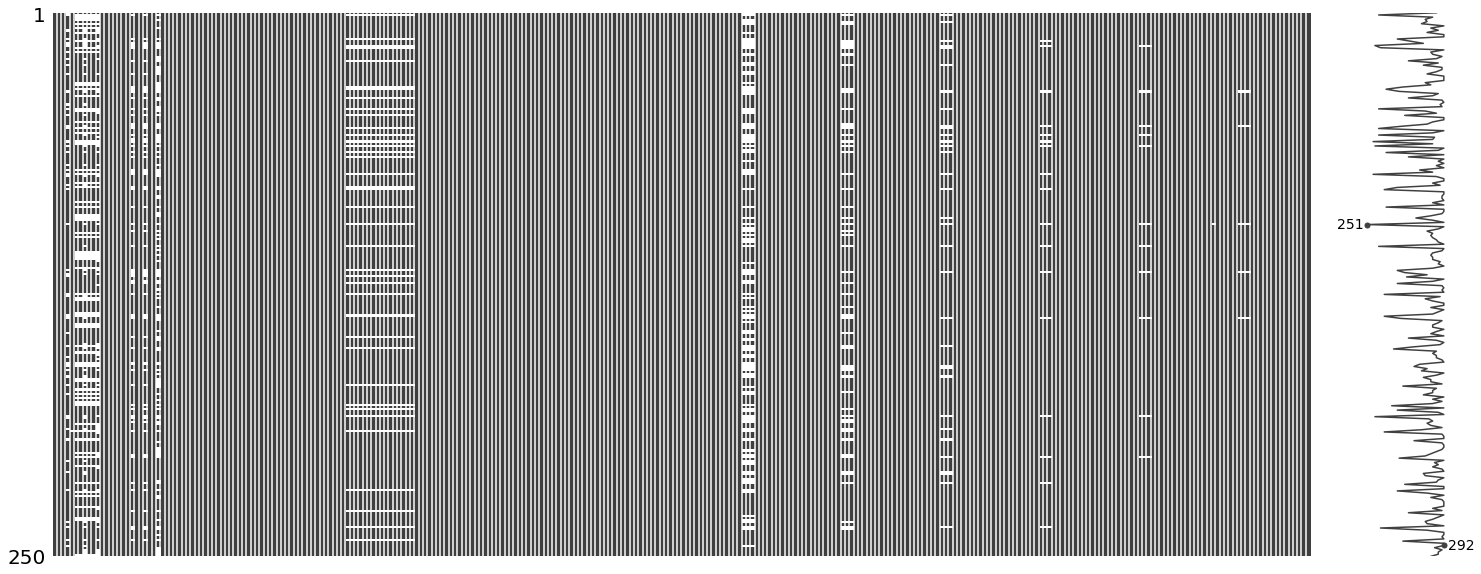

In [4]:
msno.matrix(srb.sample(250))

In [ ]:
srb.columns

In [55]:
# cafe_sum_500_min_price_avg -> Cafes and restaurant min average bill in 500 meters zone
# cafe_sum_500_max_price_avg -> Cafes and restaurant max average bill in 500 meters zone
# cafe_avg_price_500 -> Cafes and restaurant average bill in 500 meters zone
# cafe_sum_1000_min_price_avg -> Cafes and restaurant min average bill in 1000 meters zone

group4 = ["cafe_sum_500_min_price_avg", "cafe_sum_500_max_price_avg", 
          "cafe_avg_price_500", "cafe_sum_1000_min_price_avg"]

In [57]:
group4DF = srb[group4]

In [64]:
temp = group4DF.isnull().sum().to_frame()
temp.columns = ['numberMissing']
temp['percentMissing'] = (temp.numberMissing / nrows) * 100
temp

,numberMissing,percentMissing
cafe_sum_500_min_price_avg,13281,43.585704
cafe_sum_500_max_price_avg,13281,43.585704
cafe_avg_price_500,13281,43.585704
cafe_sum_1000_min_price_avg,6524,21.410521


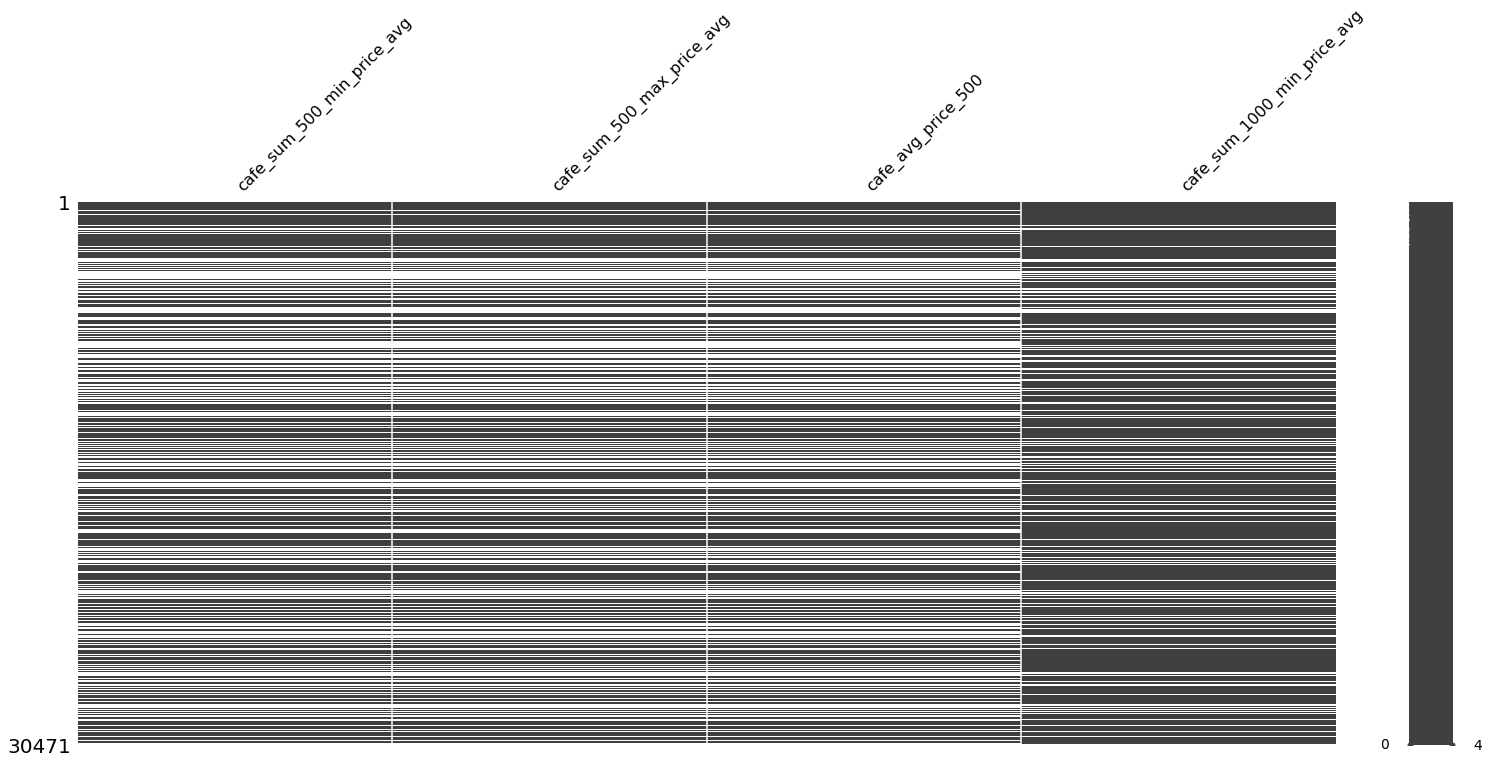

In [58]:
msno.matrix(group4DF)

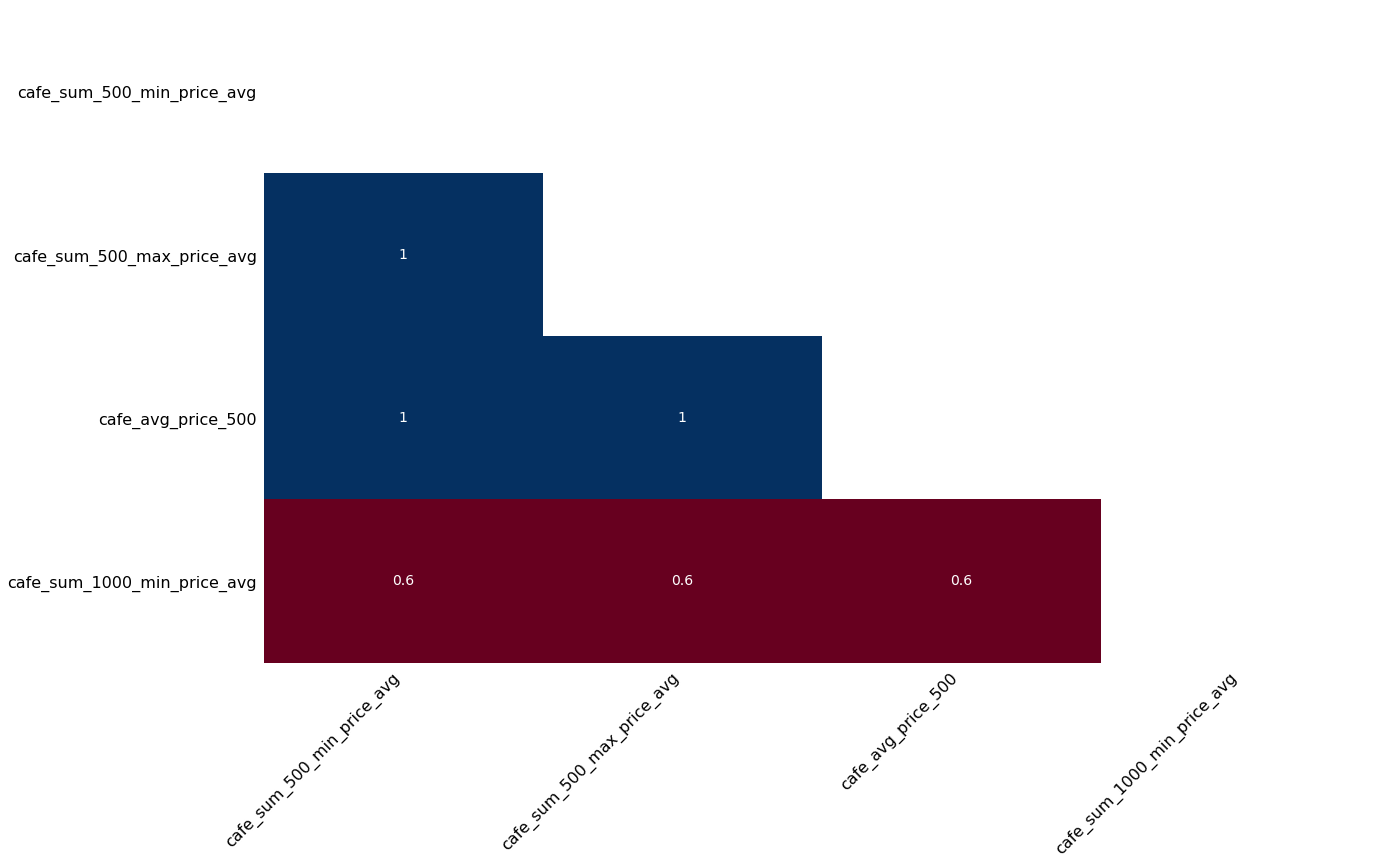

In [62]:
msno.heatmap(group4DF)

How many variables are of type object in the dataset ?

In [ ]:
srb_obj = srb.select_dtypes(['object'])
srb_obj.info()

In [ ]:
srb_int = srb.select_dtypes(['int64'])
srb_int.info(verbose=True)

In [ ]:
srb.price_doc.head()

#### Columns with missing values

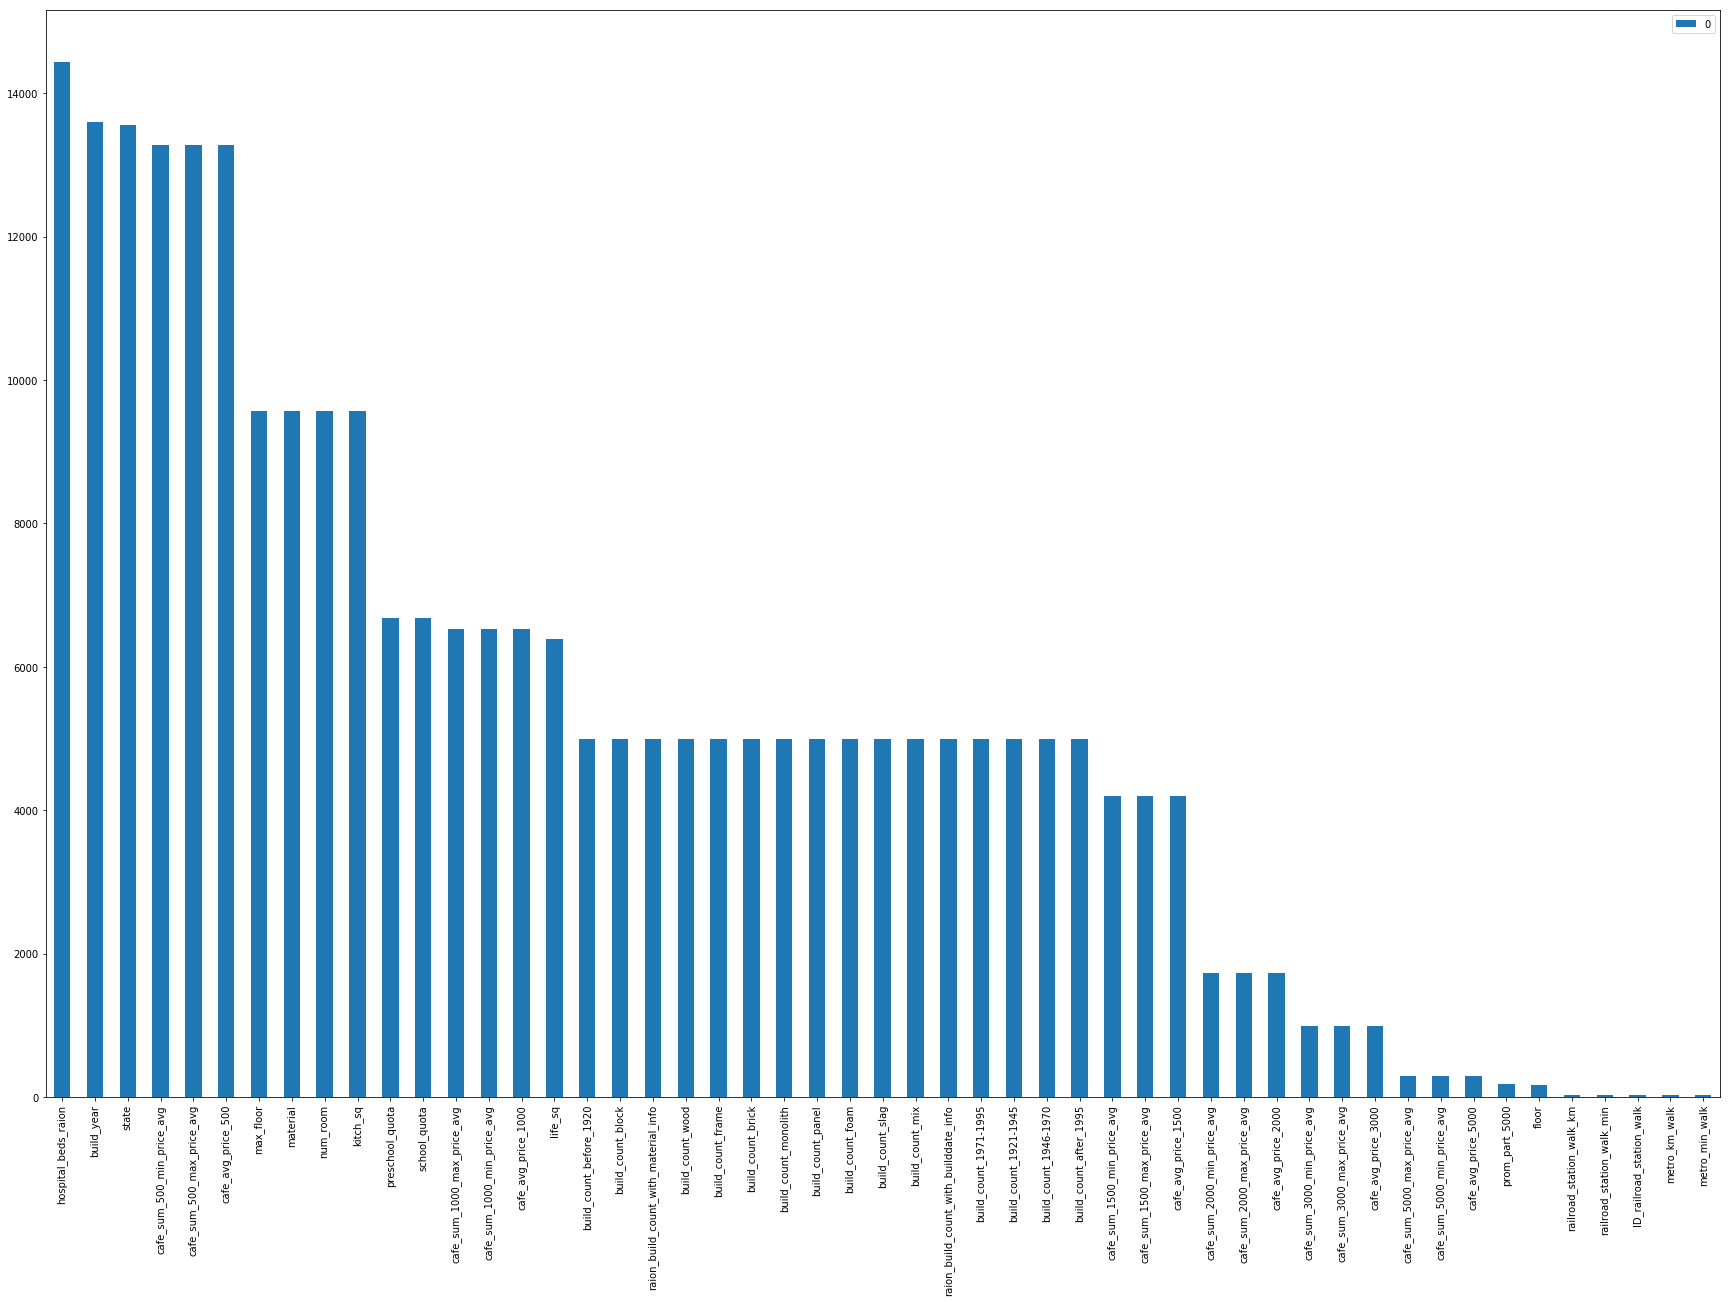

In [13]:
temp = srb.isnull().sum()
temp = temp[temp > 0]
missingDataCols = temp.sort_values(ascending=False)
missingDataCols.to_frame().plot(kind='bar', figsize=(30, 20))

## Calculate the perctange of missing values

In [28]:
# convert the series to a dataframe.
missingDataColsDF = missingDataCols.to_frame()
missingDataColsDF.columns = ['numberMissing']
missingDataColsDF.info()

# calculate the percentage of missing values.
missingDataColsDF['percentMissing'] = (missingDataColsDF.numberMissing / nrows) * 100

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, hospital_beds_raion to metro_min_walk
Data columns (total 1 columns):
numberMissing    51 non-null int64
dtypes: int64(1)
memory usage: 3.3+ KB


In [29]:
missingDataColsDF.columns

Index(['numberMissing', 'percentMissing'], dtype='object')

In [31]:
missingDataColsDF

,numberMissing,percentMissing
hospital_beds_raion,14441,47.392603
build_year,13605,44.649011
state,13559,44.498047
cafe_sum_500_min_price_avg,13281,43.585704
cafe_sum_500_max_price_avg,13281,43.585704
cafe_avg_price_500,13281,43.585704
max_floor,9572,31.413475
material,9572,31.413475
num_room,9572,31.413475
kitch_sq,9572,31.413475


In [37]:
build_count = missingDataColsDF[missingDataColsDF.index.str.contains('build_count')]

In [38]:
build_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, build_count_before_1920 to build_count_after_1995
Data columns (total 2 columns):
numberMissing     16 non-null int64
percentMissing    16 non-null float64
dtypes: float64(1), int64(1)
memory usage: 384.0+ bytes


In [41]:
build_count = build_count.drop(columns= 'percentMissing', axis=1)

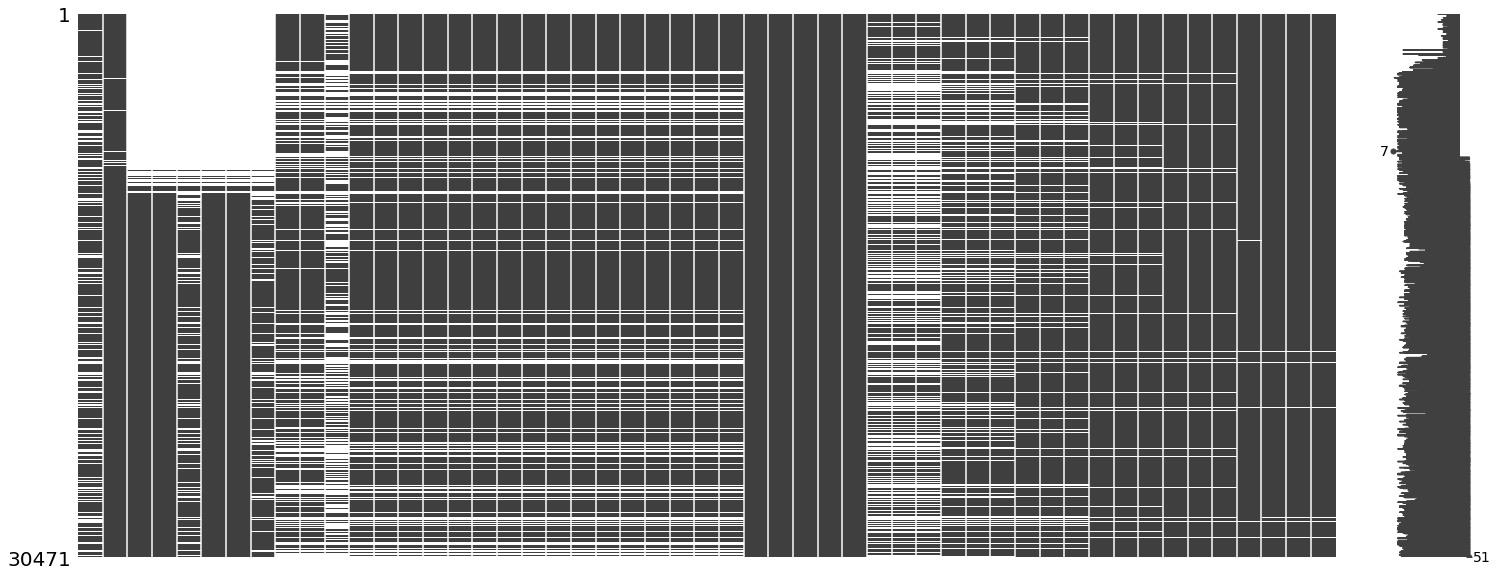

In [44]:
temp = srb.isnull().sum()
temp = temp[temp > 0]
srbMissing = srb[temp.index]
msno.matrix(srbMissing)

The nullity matrix gives you a data-dense display which lets you quickly visually pick out the missing data patterns in the dataset. Also, the sparkline on the right gives you a summary of the general shape of the data completeness and an indicator of the rows with maximum and minimum rows.

In [45]:
srbMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 51 columns):
life_sq                                  24088 non-null float64
floor                                    30304 non-null float64
max_floor                                20899 non-null float64
material                                 20899 non-null float64
build_year                               16866 non-null float64
num_room                                 20899 non-null float64
kitch_sq                                 20899 non-null float64
state                                    16912 non-null float64
preschool_quota                          23783 non-null float64
school_quota                             23786 non-null float64
hospital_beds_raion                      16030 non-null float64
raion_build_count_with_material_info     25480 non-null float64
build_count_block                        25480 non-null float64
build_count_wood                         25480 non-null flo

In [46]:
srb.shape

(30471, 292)

In [ ]:
msno.bar(srbMissing, color="blue", log=False, figsize=(30,18))

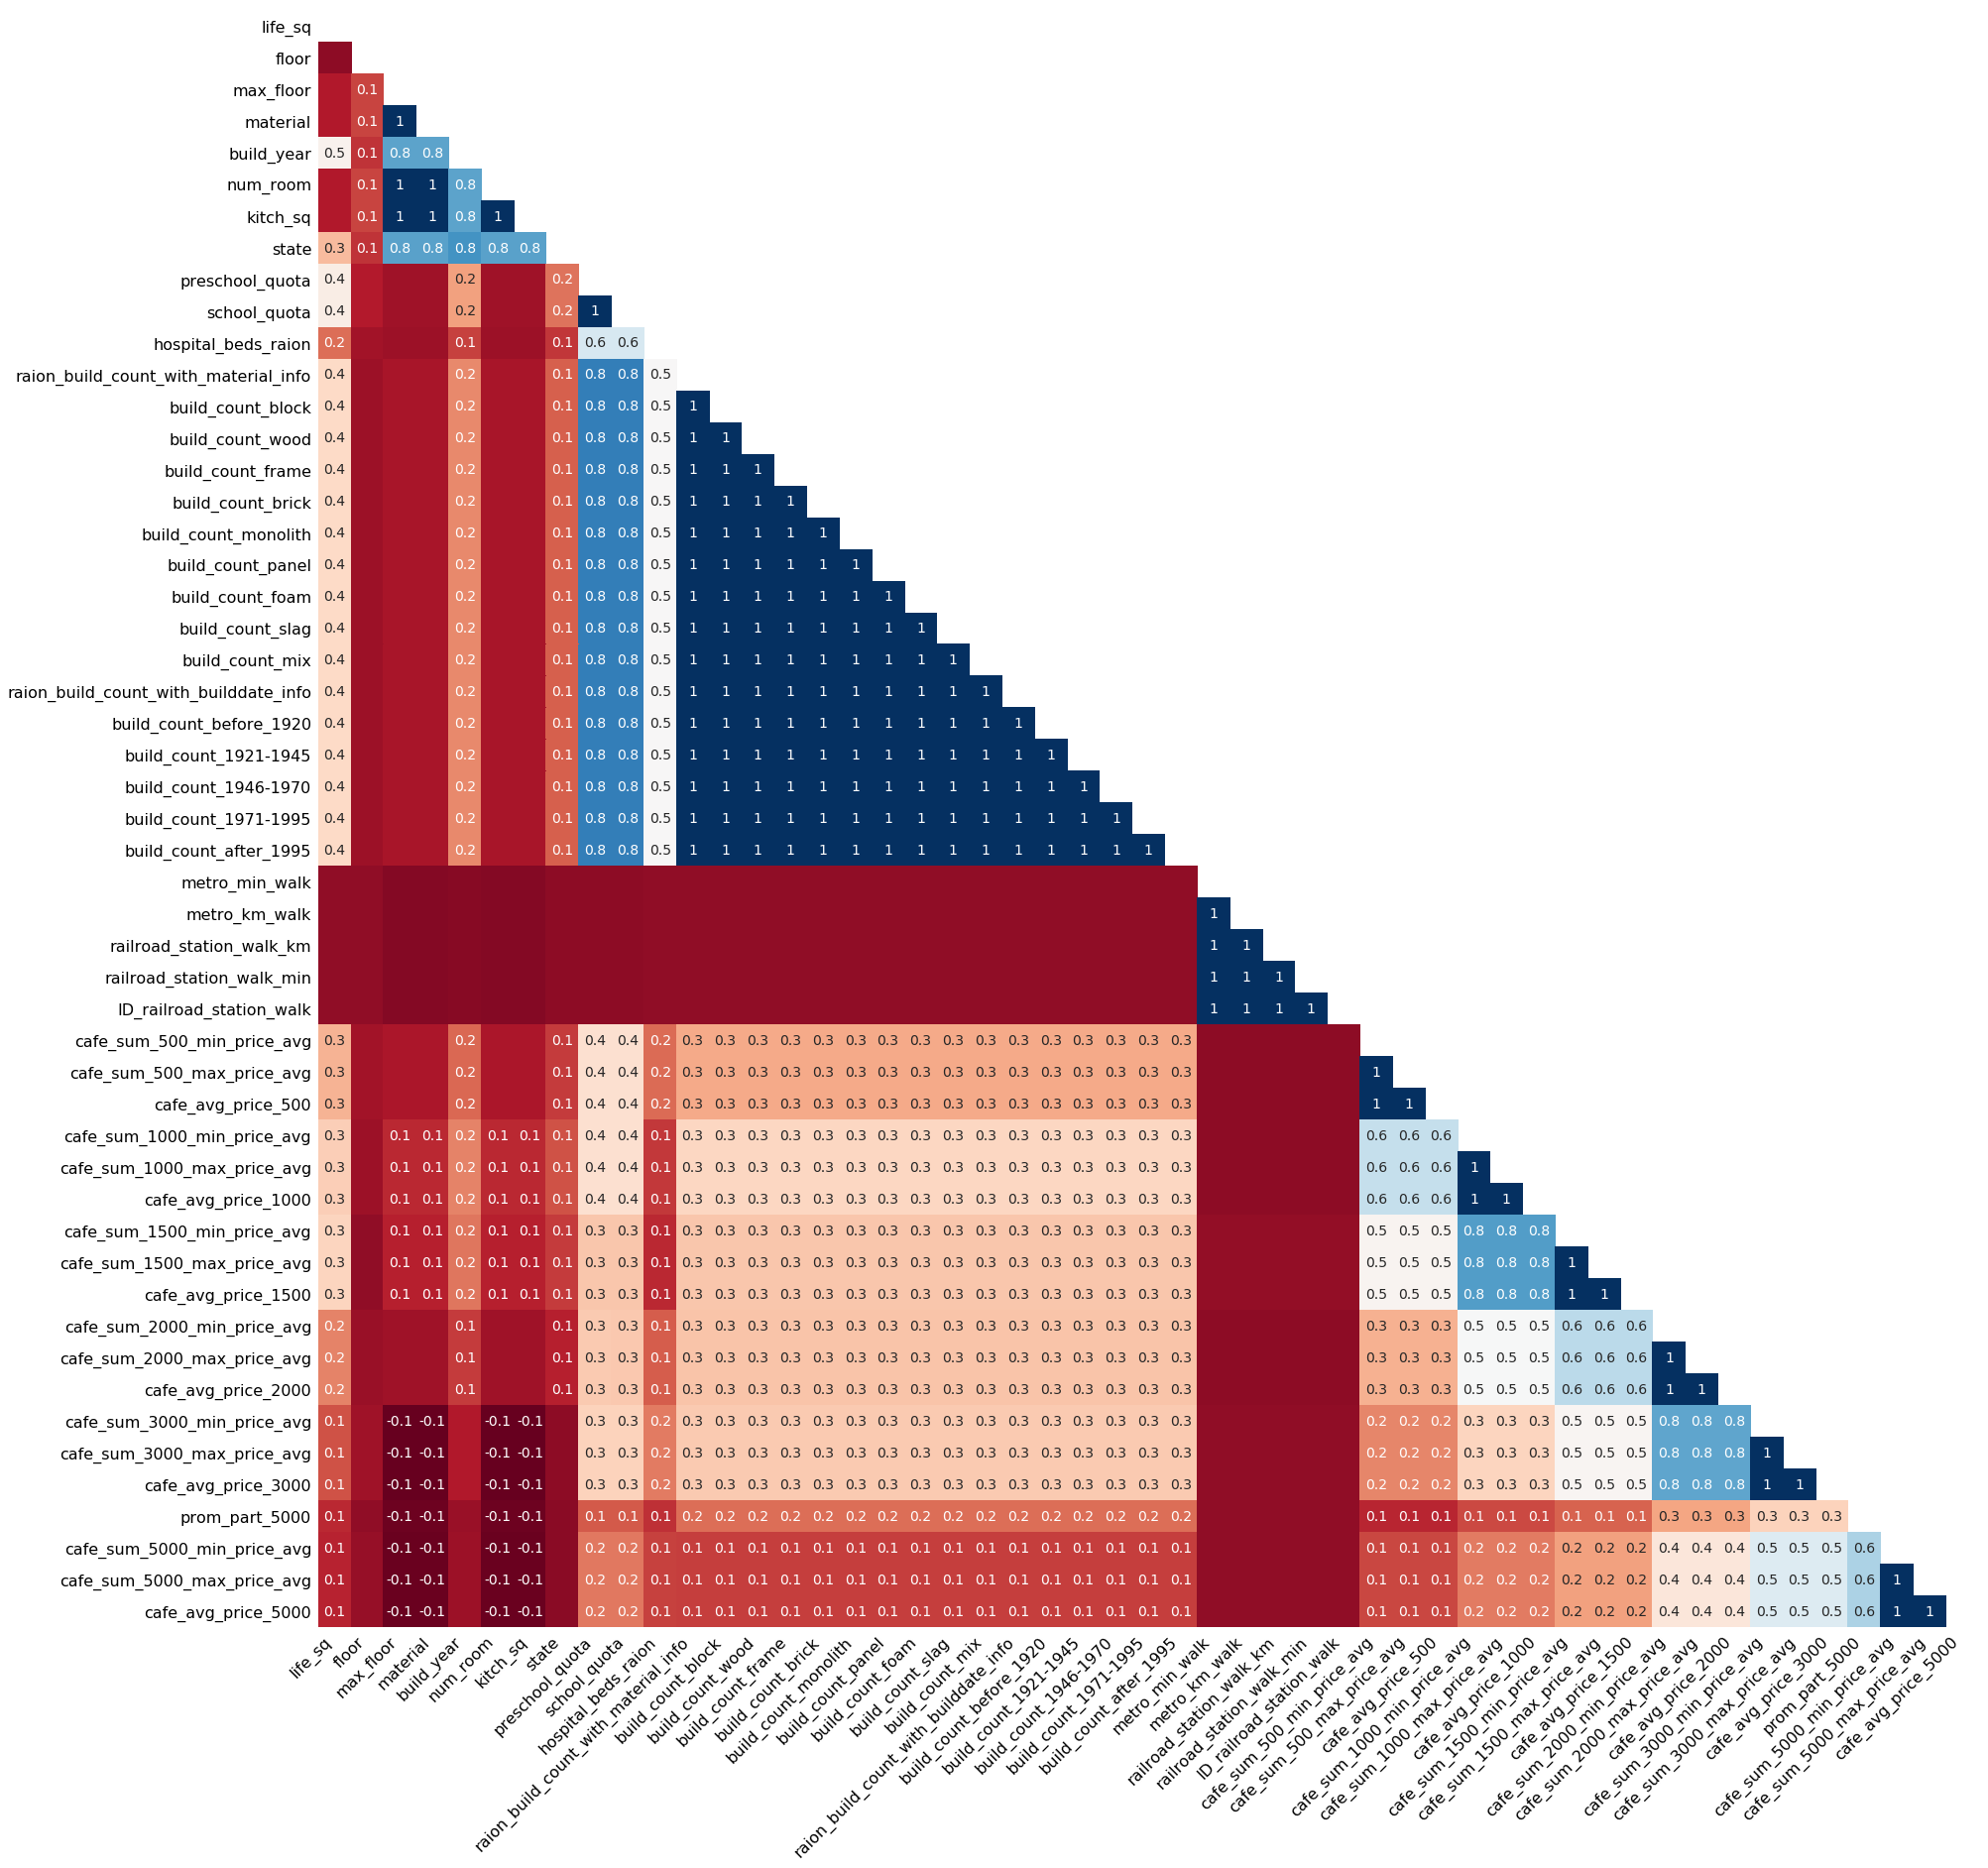

In [47]:
msno.heatmap(srbMissing, figsize=(30, 30))

## Percentage of missing values

In [49]:
import numpy as np

In [50]:
data = {'Name': ['John','Paul', np.NaN, 'Wale', 'Mary', 'Carli', 'Steve'], 'Age': [21,23,np.nan,19,25,np.nan,15],'Sex': ['M',np.nan,np.nan,'M','F','F','M'],'Goals': [5,10,np.nan,19,5,0,7],'Assists': [7,4,np.nan,9,7,6,4],'Value': [55,84,np.nan,90,63,15,46]}  
df=pd.DataFrame(data, columns =['Name','Age','Sex','Goals', 'Assists', 'Value'])

In [51]:
df

,Name,Age,Sex,Goals,Assists,Value
0,John,21.0,M,5.0,7.0,55.0
1,Paul,23.0,NaN,10.0,4.0,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Wale,19.0,M,19.0,9.0,90.0
4,Mary,25.0,F,5.0,7.0,63.0
5,Carli,NaN,F,0.0,6.0,15.0
6,Steve,15.0,M,7.0,4.0,46.0


In [52]:
df.dropna()

,Name,Age,Sex,Goals,Assists,Value
0,John,21.0,M,5.0,7.0,55.0
3,Wale,19.0,M,19.0,9.0,90.0
4,Mary,25.0,F,5.0,7.0,63.0
6,Steve,15.0,M,7.0,4.0,46.0


In [54]:
df.dropna(how='all')

,Name,Age,Sex,Goals,Assists,Value
0,John,21.0,M,5.0,7.0,55.0
1,Paul,23.0,NaN,10.0,4.0,84.0
3,Wale,19.0,M,19.0,9.0,90.0
4,Mary,25.0,F,5.0,7.0,63.0
5,Carli,NaN,F,0.0,6.0,15.0
6,Steve,15.0,M,7.0,4.0,46.0


In [ ]:
n = 0
a= 300000
for i in range(a):
    x = np.random

Shravans-MacBook-Pro:~ Shravan$ `conda create --name casestudy1`

Solving environment: done

**Package Plan**

  environment location: /Users/Shravan/anaconda3/envs/casestudy1

  added / updated specs:
    - ipython
    - jupyter
    - matplotlib
    - numpy
    - pandas
    - pip
    - scikit-learn
    - scipy
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.14.3               |   py36h9d02e6b_0          42 KB
    kiwisolver-1.0.1           |   py36h792292d_0          56 KB
    libedit-3.1.20170329       |       hb402a30_2         154 KB
    scipy-1.1.0                |   py36hcaad992_0        15.4 MB
    pip-10.0.1                 |           py36_0         1.8 MB
    matplotlib-2.2.2           |   py36ha7267d0_0         6.7 MB
    ncurses-6.1                |       h0a44026_0         888 KB
    ipython-6.4.0              |           py36_0         1.0 MB
    numpy-base-1.14.3          |   py36ha9ae307_0         4.0 MB
    setuptools-39.1.0          |           py36_0         549 KB
    ------------------------------------------------------------
                                           Total:        30.5 MB

The following NEW packages will be INSTALLED:

    appnope:            0.1.0-py36hf537a9a_0
    backcall:           0.1.0-py36_0
    bleach:             2.1.3-py36_0
    ca-certificates:    2018.03.07-0
    certifi:            2018.4.16-py36_0
    cycler:             0.10.0-py36hfc81398_0
    dbus:               1.13.2-h760590f_1
    decorator:          4.3.0-py36_0
    entrypoints:        0.2.3-py36hd81d71f_2
    expat:              2.2.5-hb8e80ba_0
    freetype:           2.8-h12048fb_1
    gettext:            0.19.8.1-h15daf44_3
    glib:               2.56.1-h35bc53a_0
    html5lib:           1.0.1-py36h2f9c1c0_0
    icu:                58.2-h4b95b61_1
    intel-openmp:       2018.0.0-8
    ipykernel:          4.8.2-py36_0
    ipython:            6.4.0-py36_0
    ipython_genutils:   0.2.0-py36h241746c_0
    ipywidgets:         7.2.1-py36_0
    jedi:               0.12.0-py36_1
    jinja2:             2.10-py36hd36f9c5_0
    jpeg:               9b-he5867d9_2
    jsonschema:         2.6.0-py36hb385e00_0
    jupyter:            1.0.0-py36_4
    jupyter_client:     5.2.3-py36_0
    jupyter_console:    5.2.0-py36hccf5b1c_1
    jupyter_core:       4.4.0-py36h79cf704_0
    kiwisolver:         1.0.1-py36h792292d_0
    libcxx:             4.0.1-h579ed51_0
    libcxxabi:          4.0.1-hebd6815_0
    libedit:            3.1.20170329-hb402a30_2
    libffi:             3.2.1-h475c297_4
    libgfortran:        3.0.1-h93005f0_2
    libiconv:           1.15-hdd342a3_7
    libpng:             1.6.34-he12f830_0
    libsodium:          1.0.16-h3efe00b_0
    markupsafe:         1.0-py36h3a1e703_1
    matplotlib:         2.2.2-py36ha7267d0_0
    mistune:            0.8.3-py36h1de35cc_1
    mkl:                2018.0.2-1
    mkl_fft:            1.0.1-py36h917ab60_0
    mkl_random:         1.0.1-py36h78cc56f_0
    nbconvert:          5.3.1-py36h810822e_0
    nbformat:           4.4.0-py36h827af21_0
    ncurses:            6.1-h0a44026_0
    notebook:           5.4.1-py36_0
    numpy:              1.14.3-py36h9d02e6b_0
    numpy-base:         1.14.3-py36ha9ae307_0
    openssl:            1.0.2o-h26aff7b_0
    pandas:             0.22.0-py36h0a44026_0
    pandoc:             1.19.2.1-ha5e8f32_1
    pandocfilters:      1.4.2-py36h3b0b094_1
    parso:              0.2.0-py36_0
    patsy:              0.5.0-py36_0
    pcre:               8.42-h378b8a2_0
    pexpect:            4.5.0-py36_0
    pickleshare:        0.7.4-py36hf512f8e_0
    pip:                10.0.1-py36_0
    prompt_toolkit:     1.0.15-py36haeda067_0
    ptyprocess:         0.5.2-py36he6521c3_0
    pygments:           2.2.0-py36h240cd3f_0
    pyparsing:          2.2.0-py36hb281f35_0
    pyqt:               5.9.2-py36h11d3b92_0
    python:             3.6.5-hc167b69_1
    python-dateutil:    2.7.2-py36_0
    pytz:               2018.4-py36_0
    pyzmq:              17.0.0-py36h1de35cc_1
    qt:                 5.9.5-h02808f3_0
    qtconsole:          4.3.1-py36hd96c0ff_0
    readline:           7.0-hc1231fa_4
    scikit-learn:       0.19.1-py36hffbff8c_0
    scipy:              1.1.0-py36hcaad992_0
    seaborn:            0.8.1-py36h595ecd9_0
    send2trash:         1.5.0-py36_0
    setuptools:         39.1.0-py36_0
    simplegeneric:      0.8.1-py36_2
    sip:                4.19.8-py36h0a44026_0
    six:                1.11.0-py36h0e22d5e_1
    sqlite:             3.23.1-hf1716c9_0
    statsmodels:        0.8.0-py36h9c68fc9_0
    terminado:          0.8.1-py36_1
    testpath:           0.3.1-py36h625a49b_0
    tk:                 8.6.7-h35a86e2_3
    tornado:            5.0.2-py36_0
    traitlets:          4.3.2-py36h65bd3ce_0
    wcwidth:            0.1.7-py36h8c6ec74_0
    webencodings:       0.5.1-py36h3b9701d_1
    wheel:              0.31.0-py36_0
    widgetsnbextension: 3.2.1-py36_0
    xz:                 5.2.3-h727817e_4
    zeromq:             4.2.5-h378b8a2_0
    zlib:               1.2.11-hf3cbc9b_2

Proceed ([y]/n)? y

To activate this environment, use:
> source activate casestudy1

To deactivate an active environment, use:
> source deactivate

Common Conda Commands:
    - conda list : This will print the list of packages installed in the current environment.
    

(casestudy1) Shravans-MacBook-Pro:dataMining Shravan$ which pip

/Users/Shravan/anaconda3/envs/casestudy1/bin/pip

(casestudy1) Shravans-MacBook-Pro:dataMining Shravan$ pip install missingno

Collecting missingno

  Downloading https://files.pythonhosted.org/packages/c8/84/4a058c3c5573f5465f28856b356f80468a5d86337659533a9b7669ee6db7/missingno-0.4.0.tar.gz
Requirement already satisfied: numpy in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from missingno) (1.14.3)
Requirement already satisfied: matplotlib in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from missingno) (2.2.2)
Requirement already satisfied: scipy in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from missingno) (1.1.0)
Requirement already satisfied: seaborn in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from missingno) (0.8.1)
Requirement already satisfied: cycler>=0.10 in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from matplotlib->missingno) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from matplotlib->missingno) (2.2.0)
Requirement already satisfied: python-dateutil>=2.1 in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from matplotlib->missingno) (2.7.2)
Requirement already satisfied: pytz in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from matplotlib->missingno) (2018.4)
Requirement already satisfied: six>=1.10 in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from matplotlib->missingno) (1.11.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from matplotlib->missingno) (1.0.1)
Requirement already satisfied: pandas in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from seaborn->missingno) (0.22.0)
Requirement already satisfied: setuptools in /Users/Shravan/anaconda3/envs/casestudy1/lib/python3.6/site-packages (from kiwisolver>=1.0.1->matplotlib->missingno) (39.1.0)
Building wheels for collected packages: missingno
  Running setup.py bdist_wheel for missingno ... done
  Stored in directory: /Users/Shravan/Library/Caches/pip/wheels/e7/f2/2a/767a612cde8834415d23ab484c5d069fcd0ab3a85052cda6a6
Successfully built missingno
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
Installing collected packages: missingno
Successfully installed missingno-0.4.0
(casestudy1) Shravans-MacBook-Pro:dataMining Shravan$

You can think of Bayesian as "Belief based on evidence" You update your belief based on the evidence. 

Bayesian resources. 

Resources for MCMC.

